In [15]:
%load_ext autoreload
%autoreload 2

import datetime
import numpy as np
import scipy as sp
import pandas as pd
import functools as fts
import multiprocessing as mp
from tqdm.notebook import tqdm
from tqdm.contrib import tzip, tenumerate, tmap

from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.storagelevel import StorageLevel
from pyspark.sql.functions import col
import pyspark.sql.types as pstype
import pyspark.sql.functions as F
import pyspark as ps

import matplotlib as mlt
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML
import japanize_matplotlib

from time_series_model import *
from create_time_series import *

%matplotlib inline
%matplotlib ipympl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
np.set_printoptions(threshold=100, precision=6, linewidth=10000)

In [17]:
SPECIFIED_PATH = "csv_data/"
SPECIFIED_DATE = "20240918"
SPECIFIED_CSV  = SPECIFIED_PATH + SPECIFIED_DATE

In [27]:
pd_data = pd.read_csv(SPECIFIED_CSV + "_urp_data.csv")
pd_data

,x_data
0,69.183208
1,-25.297397
2,-48.319323
3,54.376652
4,162.730243
...,...
4995,27966.619584
4996,27973.309364
4997,27979.406271
4998,27973.952624


各時系列軸の係数： [[0.998281]]
切片の係数： [[12.85231]]
1次トレンドの係数： [[0.007319]]
2次トレンドの係数： [[0.]]


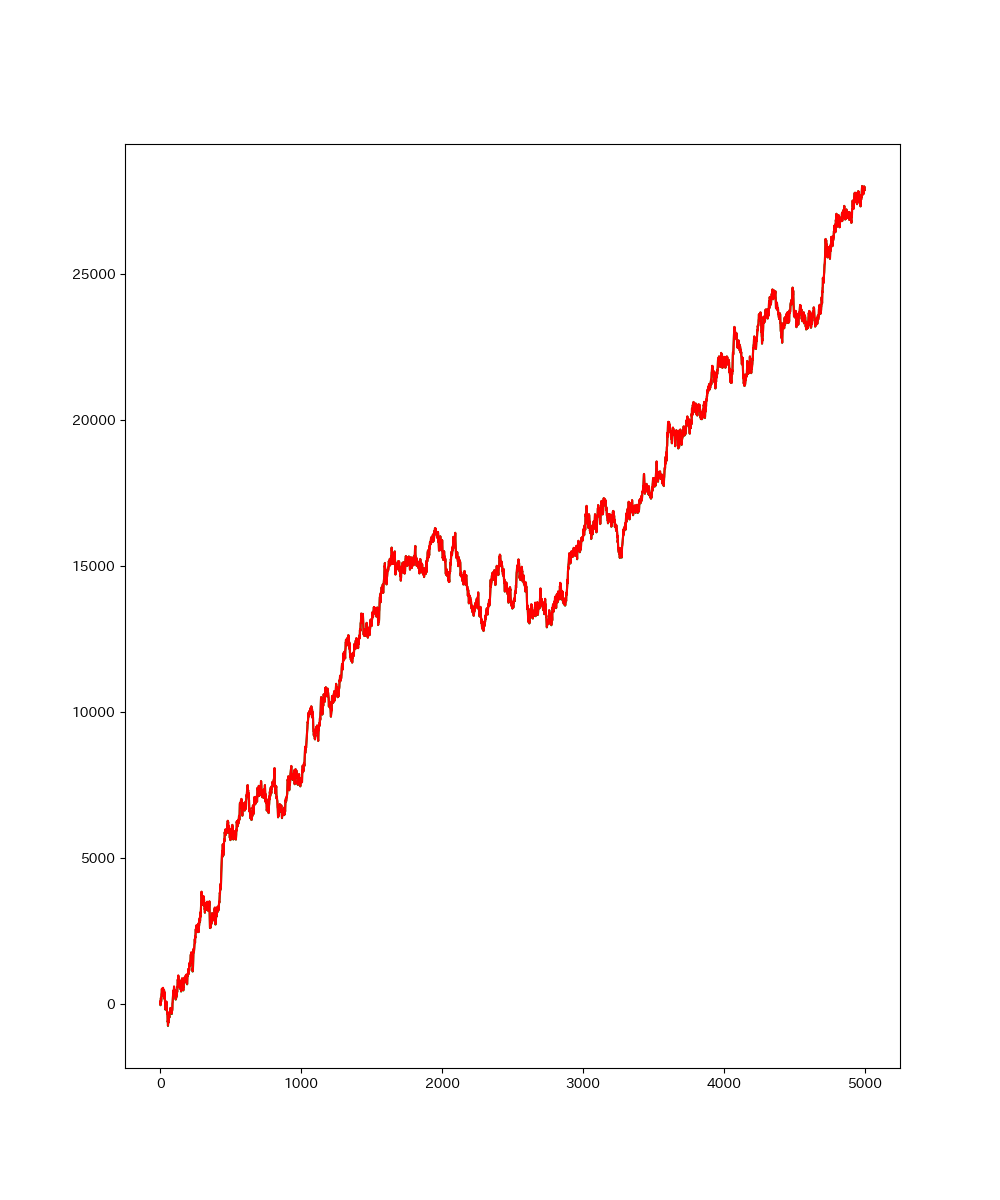

In [28]:
# regression：データ構造により以下から指定
# n  ・・・定数項なし&トレンドなし
# c  ・・・定数項あり&トレンドなし
# ct ・・・定数項あり&1次のトレンドあり
# ctt・・・定数項あり&1次のトレンドあり&2次のトレンドあり
dfruler = Dickey_Fuller_Test(pd_data, regression="ct")
dfruler.fit()
y_pred = dfruler.predict(pd_data, np.arange(1, len(pd_data)+1).reshape([len(pd_data), 1]))

plt.figure(figsize=(10, 12))
plt.plot(pd_data[-len(y_pred):], "-", color="green")
plt.plot(y_pred,                 "-", color="red")

print("各時系列軸の係数：", dfruler.alpha)
print("切片の係数：", dfruler.alpha0)
print("1次トレンドの係数：", dfruler.trend_1st)
print("2次トレンドの係数：", dfruler.trend_2nd)

AR model | aic
selected orders | 1
各時系列軸の係数： [[ 0.998294 -0.029832]]
切片の係数： [[13.093701]]
1次トレンドの係数： [[0.007219]]
2次トレンドの係数： [[0.]]


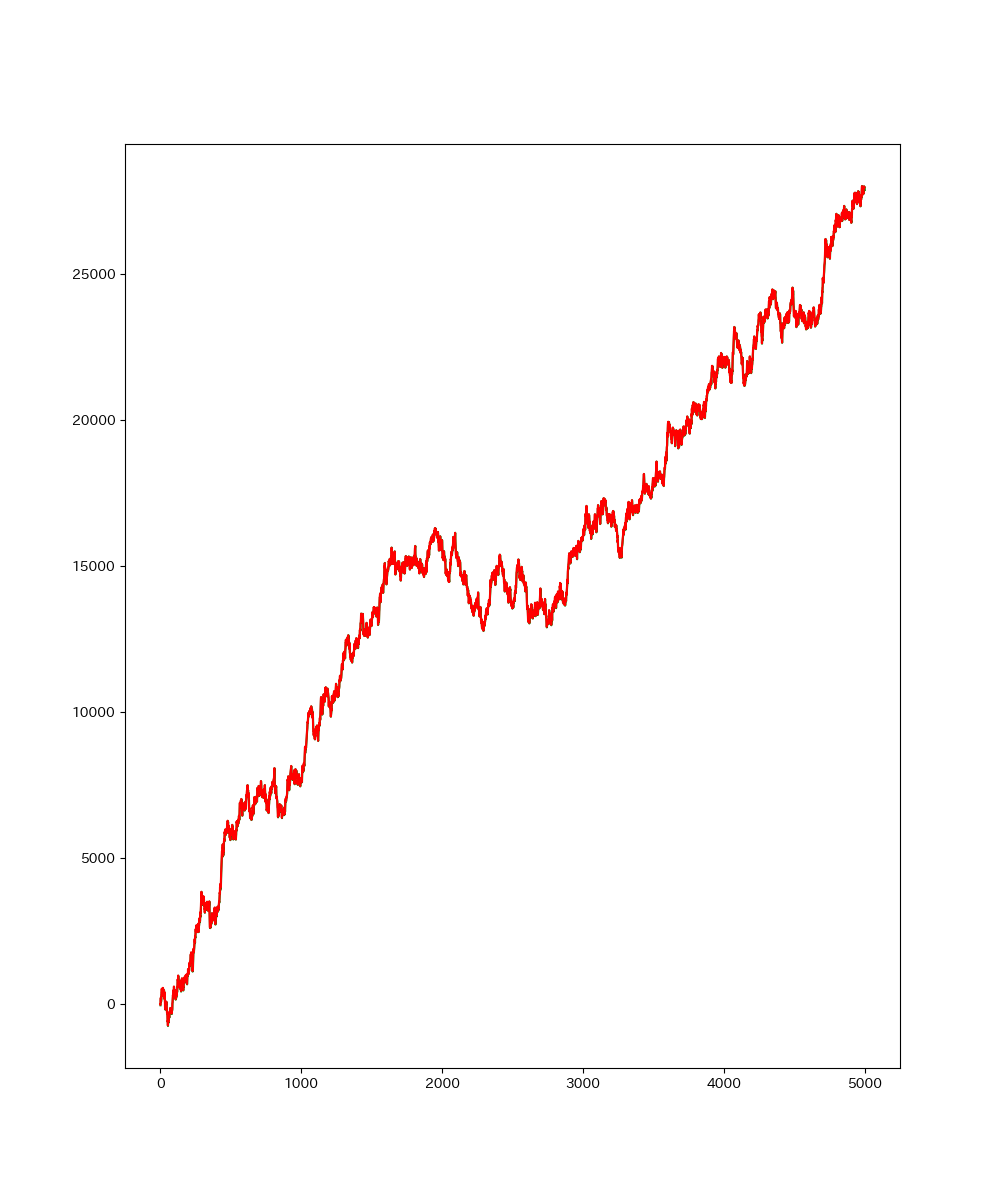

In [29]:
# regression：データ構造により以下から指定
# n  ・・・定数項なし&トレンドなし
# c  ・・・定数項あり&トレンドなし
# ct ・・・定数項あり&1次のトレンドあり
# ctt・・・定数項あり&1次のトレンドあり&2次のトレンドあり
adfruler = Augmented_Dickey_Fuller_Test(pd_data, regression="ct")
adfruler.select_order(maxlag=20, ic="aic", isVisible=True)
y_pred = adfruler.predict(pd_data, np.arange(1, len(pd_data)+1).reshape([len(pd_data), 1]))

plt.figure(figsize=(10, 12))
plt.plot(pd_data[-len(y_pred):], "-", color="green")
plt.plot(y_pred,                 "-", color="red")

print("各時系列軸の係数：", adfruler.alpha.T)
print("切片の係数：", adfruler.alpha0)
print("1次トレンドの係数：", adfruler.trend_1st)
print("2次トレンドの係数：", adfruler.trend_2nd)

In [ ]:
# regression：データ構造により以下から指定
# n  ・・・定数項なし&トレンドなし
# c  ・・・定数項あり&トレンドなし
# ct ・・・定数項あり&1次のトレンドあり
# ctt・・・定数項あり&1次のトレンドあり&2次のトレンドあり

T = 3000
N = 10**5
sigma = 10
const = 5000
δ1    = 10
δ2    = 5.5
regression = "ctt"

save_x  = [] #1次元から配列生成:保存用
save_ρ  = [] #1次元から配列生成:保存用

if __name__ == "__main__":
    with mp.Pool(processes=mp.cpu_count()-1) as p:
        input_list = [[regression, T, sigma, const, δ1, δ2] for _ in range(0, N)]
        for res in tqdm(p.imap_unordered(create_time_data, input_list), total=N, leave=False):
            x, alpha = res
            
            save_x.append(x)
            save_ρ.append(alpha)
    

# ヒストグラム
fig = plt.figure(figsize = (10,8))

ax = fig.add_subplot(2, 1, 1)
ax.hist(save_x,  bins=100, histtype='barstacked', ec='black',density=True)

ax = fig.add_subplot(2, 1, 2)
ax.hist(save_ρ,  bins=100, histtype='barstacked', ec='black',density=True)


In [ ]:
# regression：データ構造により以下から指定
# n  ・・・定数項なし&トレンドなし
# c  ・・・定数項あり&トレンドなし
# ct ・・・定数項あり&1次のトレンドあり
# ctt・・・定数項あり&1次のトレンドあり&2次のトレンドあり


save_ρ  = {
    "n"   : [],
    "c"   : [],
    "ct"  : [],
    "ctt" : [],
}
if __name__ == "__main__":
    with mp.Pool(processes=mp.cpu_count()-1) as p:
        for regression in tqdm(["n", "c", "ct", "ctt"]):
            T = 5000
            N = 10**7
            sigma = 20
            const = 5000
            δ1    = 20
            δ2    = 10
            
            input_list = [[regression, T, sigma, const, δ1, δ2] for _ in range(0, N)]
            for res in tqdm(p.imap_unordered(create_time_data, input_list), total=N, leave=False):
                _, alpha = res
            
                save_ρ[regression].append(alpha)

reg_n   = np.percentile(save_ρ["n"],   q=[0.1, 0.2, 0.5, 0.8, 1, 1.2, 1.5, 2, 98, 98.5, 98.8, 99, 99.2, 99.5, 99.8, 99.9])
reg_c   = np.percentile(save_ρ["c"],   q=[0.1, 0.2, 0.5, 0.8, 1, 1.2, 1.5, 2, 98, 98.5, 98.8, 99, 99.2, 99.5, 99.8, 99.9])
reg_ct  = np.percentile(save_ρ["ct"],  q=[0.1, 0.2, 0.5, 0.8, 1, 1.2, 1.5, 2, 98, 98.5, 98.8, 99, 99.2, 99.5, 99.8, 99.9])
reg_ctt = np.percentile(save_ρ["ctt"], q=[0.1, 0.2, 0.5, 0.8, 1, 1.2, 1.5, 2, 98, 98.5, 98.8, 99, 99.2, 99.5, 99.8, 99.9])

print("q(%)::  [0.1, 0.2, 0.5, 0.8, 1, 1.2, 1.5, 2, 98, 98.5, 98.8, 99, 99.2, 99.5, 99.8, 99.9]")
print("n   :: ", reg_n)
print("c   :: ", reg_c)
print("ct  :: ", reg_ct)
print("ctt :: ", reg_ctt)

pd_ρ_data = pd.DataFrame(save_ρ)
pd_ρ_data.to_csv("./csv_data/DF_distribution_tmp.csv.zst", header=True, index=False, compression="zstd")

In [8]:
save_ρ  = pd.read_csv("./csv_data/DF_distribution.csv.zst",     header=0, compression="zstd").to_dict(orient="list")
save_ρ2 = pd.read_csv("./csv_data/DF_distribution_ctt.csv.zst", header=0, compression="zstd").to_dict(orient="list")

Text(0.5, 1.0, 'Dickey Fuller分布  定数項あり&1次のトレンドあり&2次のトレンドあり')

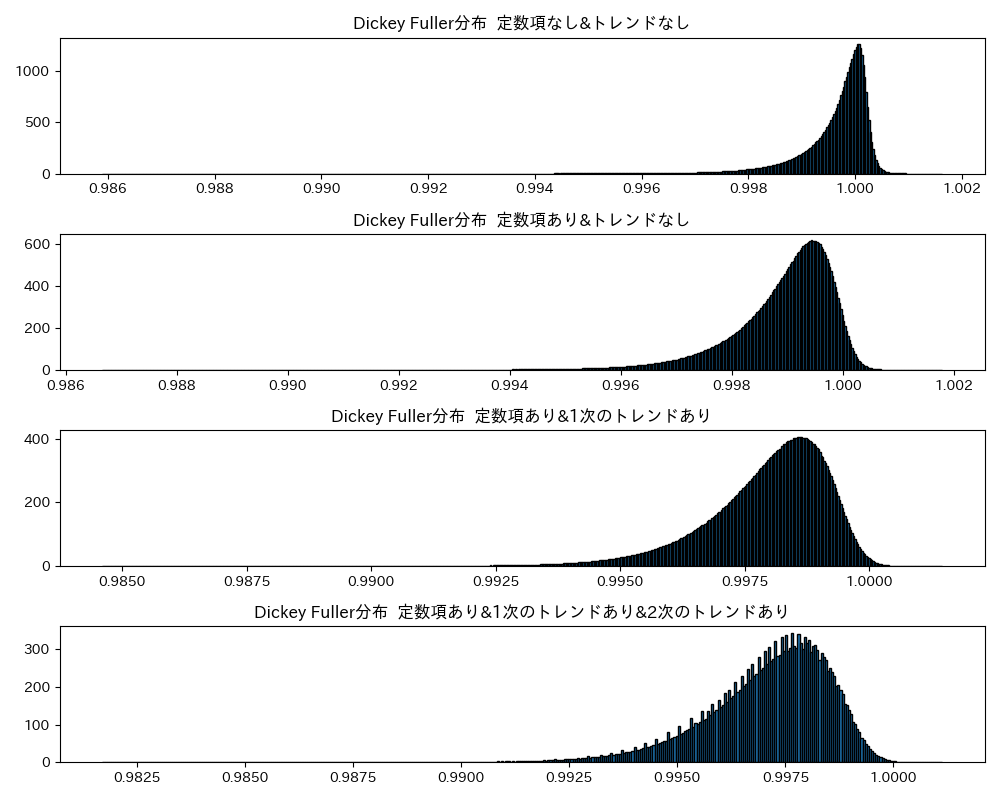

In [9]:
# ヒストグラム
fig = plt.figure(figsize = (10,8), tight_layout=True)

ax = fig.add_subplot(4, 1, 1)
ax.hist(save_ρ["n"],    bins=600, histtype='barstacked', ec='black', density=True)
ax.set_title("Dickey Fuller分布  定数項なし&トレンドなし")

ax = fig.add_subplot(4, 1, 2)
ax.hist(save_ρ["c"],    bins=600, histtype='barstacked', ec='black', density=True)
ax.set_title("Dickey Fuller分布  定数項あり&トレンドなし")

ax = fig.add_subplot(4, 1, 3)
ax.hist(save_ρ["ct"],   bins=600, histtype='barstacked', ec='black', density=True)
ax.set_title("Dickey Fuller分布  定数項あり&1次のトレンドあり")

ax = fig.add_subplot(4, 1, 4)
ax.hist(save_ρ["ctt"] + save_ρ2["ctt"],  bins=400, histtype='barstacked', ec='black', density=True)
ax.set_title("Dickey Fuller分布  定数項あり&1次のトレンドあり&2次のトレンドあり")

In [31]:
# regression：データ構造により以下から指定
# n  ・・・定数項なし&トレンドなし
# c  ・・・定数項あり&トレンドなし
# ct ・・・定数項あり&1次のトレンドあり
# ctt・・・定数項あり&1次のトレンドあり&2次のトレンドあり
dfruler = Dickey_Fuller_Test(pd_data, regression="ct")
dfruler.fit()
result = dfruler.dfRuller(qlist=[1, 5, 10])

print("DF Statistic: ", result[0])
print("p-value: ", result[1])
print("used lag: ", result[2])
print("data num: ", result[3])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print("DF検定(有意水準5%)：", True if dfruler.pvalue < 0.05 else False)

ADF Statistic:  0.9982806812268734
p-value:  0.5377373636363636
used lag:  1
data num:  4999
	1%: 0.994
	5%: 0.996
	10%: 0.996
DF検定(有意水準5%)： False
